In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
from tqdm import tqdm
from helper_functions import *
maindir = "/Users/hieunguyen/data/BS_features"
outdir = "/Users/hieunguyen/data/outdir"
data_version = "20240822"
PROJECT_nonBS = "WGS_feature_dist_distance"
PROJECT_BS = "WGBS_feature_dist_distance"

output_version = "20240822"

path_to_03_output = os.path.join(outdir, output_version, "compare_optimal_transport_dist", "03_output")

path_to_main_input = os.path.join(maindir, data_version)

metadata = pd.read_csv("full_metadata.csv")
metadata = metadata[metadata["Label"] == "Control"]
feature_name = "Nucleosome"

nonbsdf = pd.read_csv(os.path.join(outdir, PROJECT_nonBS, output_version, "01_output",  "{}.{}.csv".format("Control", feature_name)), index_col = [0])



In [2]:
bsdata = dict()
nonbsdata = dict()
for input_set in metadata.Set.unique():
    bsdata[input_set] = metadata[metadata.Set == input_set].BS_labcode.unique()
    nonbsdata[input_set] = metadata[metadata.Set == input_set].nonBS_labcode.unique()

In [5]:


nonbs_barycenterdf = pd.DataFrame()
for run in tqdm(nonbsdata.keys()):
    available_samples = [item for item in nonbsdata[run] if item in nonbsdf.columns]
    print("Number of samples", len(available_samples))
    tmpdf = pd.DataFrame(data = calculate_barycenter(nonbsdf[available_samples].to_numpy(), show_plot = False, n = 601), columns = [run])
    nonbs_barycenterdf = pd.concat([nonbs_barycenterdf, tmpdf], axis = 1)
    
nonbs_barycenterdf["variance"] = nonbs_barycenterdf.var(axis = 1)



 25%|██▌       | 2/8 [00:00<00:00, 17.17it/s]

Number of samples 250
Number of samples 16
Number of samples 45


 50%|█████     | 4/8 [00:00<00:00,  8.94it/s]

Number of samples 120
Number of samples 53


 75%|███████▌  | 6/8 [00:00<00:00, 10.89it/s]

Number of samples 13
Number of samples 36
Number of samples 0


100%|██████████| 8/8 [00:00<00:00, 11.03it/s]


In [7]:
nonbs_dist = dict()
for input_test_set in [item for item in nonbsdata.keys() if "test" in item and item != "test6"]:
    nonbs_dist[input_test_set] = ot_distance(
        nonbs_barycenterdf[input_test_set].to_numpy(), 
        nonbs_barycenterdf["train"].to_numpy(), n = 601)
nonbs_dist = pd.DataFrame.from_dict(nonbs_dist, orient = "index", columns = ["nonBS_dist"])


<Axes: >

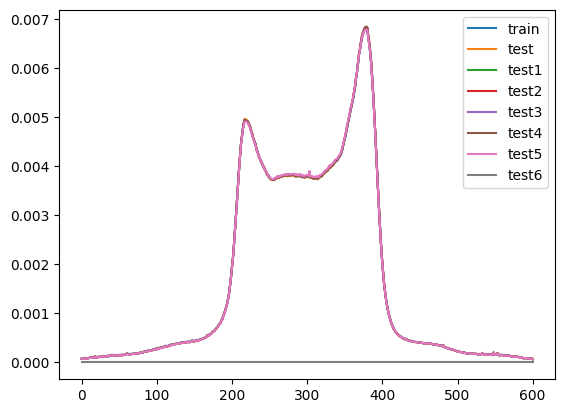

In [8]:
nonbs_barycenterdf.drop("variance", axis = 1).plot()

<Axes: >

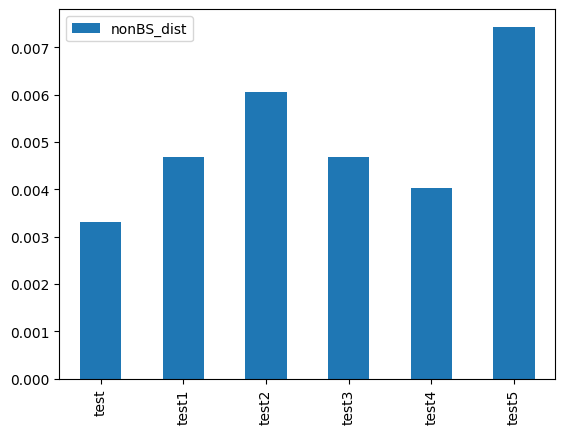

In [12]:
nonbs_dist.plot.bar()

<Axes: >

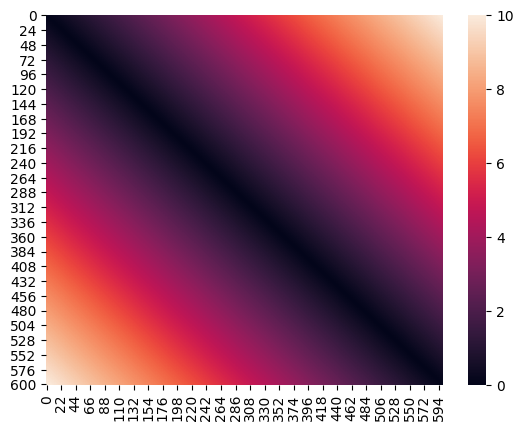

In [10]:
n = 601
x = np.arange(n, dtype=np.float64)
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)), 'euclidean')
M /= M.max() * 0.1
sns.heatmap(M)